In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/top-50-bestselling-novels-20092021-of-amazon/Amazon Top 50 Books 2009-2021 - Reworked Sheet (2).csv
/kaggle/input/top-50-bestselling-novels-20092021-of-amazon/Amazon Top 50 Books 2009-2021 - Reworked Sheet (1).csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go

In [3]:
import pandas as pd

# Load the first CSV
df1 = pd.read_csv('/kaggle/input/top-50-bestselling-novels-20092021-of-amazon/Amazon Top 50 Books 2009-2021 - Reworked Sheet (1).csv')




In [4]:
df1.head()

,Name,Author,User Rating,Reviews,Price,Price_r,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,"17,350",$8.00,$8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,"2,052",$22.00,$22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,"18,979",$15.00,$15,2018,Non Fiction
3,1984,George Orwell,4.7,"70,425",$7.48,$8,2021,Fiction
4,1984 (Signet Classics),George Orwell,4.7,"21,424",$6.00,$6,2017,Fiction


In [5]:
df1.shape

(650, 8)

In [6]:
df1.isnull().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Price_r        0
Year           0
Genre          0
dtype: int64

In [7]:
x = df1.iloc[:, [5, 6]].values


In [8]:
x.shape

(650, 2)

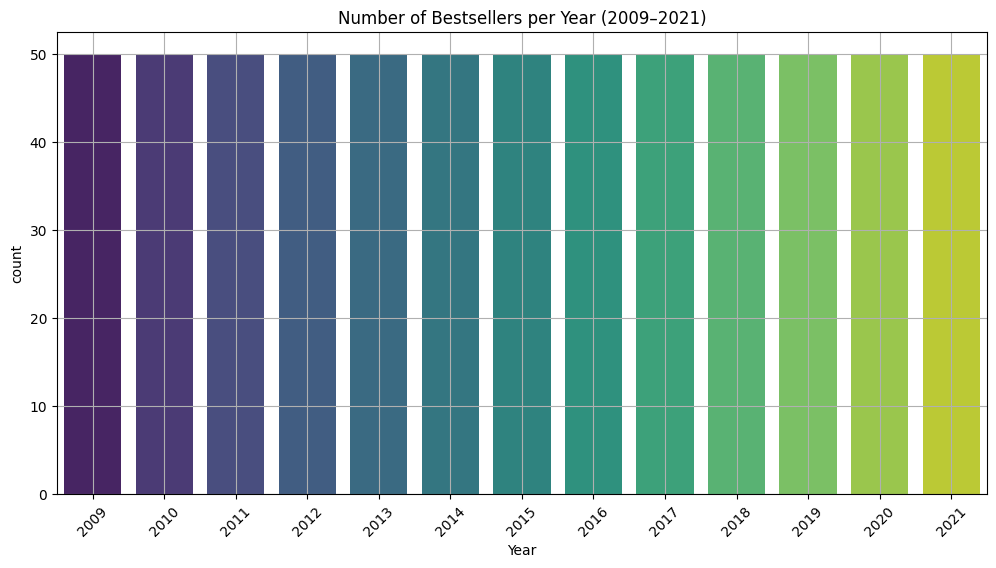

In [9]:
plt.figure(figsize=(12,6))
sns.countplot(x='Year', data=df1, palette='viridis')
plt.title('Number of Bestsellers per Year (2009–2021)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


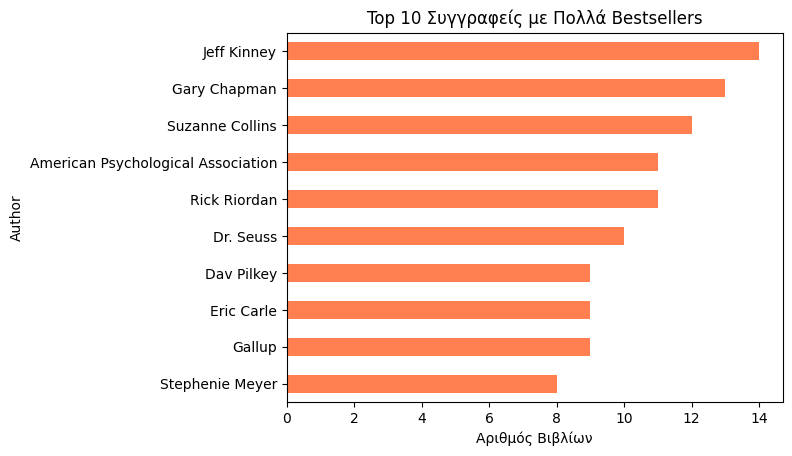

In [10]:
top_authors = df1['Author'].value_counts().head(10)
top_authors.plot(kind='barh', color='coral')
plt.title('Top 10 Συγγραφείς με Πολλά Bestsellers')
plt.xlabel('Αριθμός Βιβλίων')
plt.gca().invert_yaxis()
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


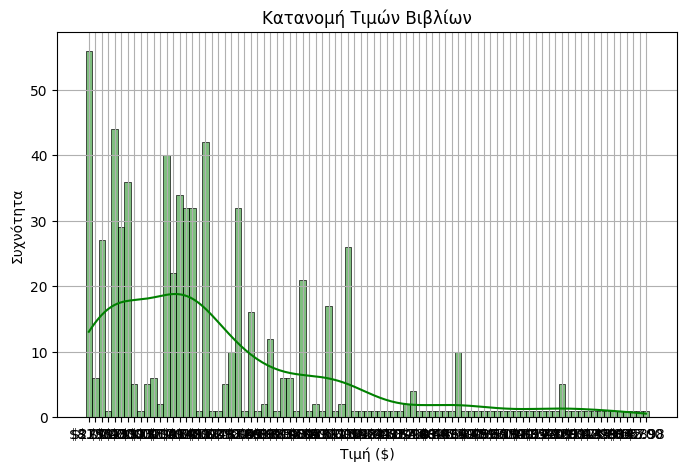

In [11]:
plt.figure(figsize=(8,5))
sns.histplot(df1['Price'], bins=20, kde=True, color='green')
plt.title('Κατανομή Τιμών Βιβλίων')
plt.xlabel('Τιμή ($)')
plt.ylabel('Συχνότητα')
plt.grid(True)
plt.show()


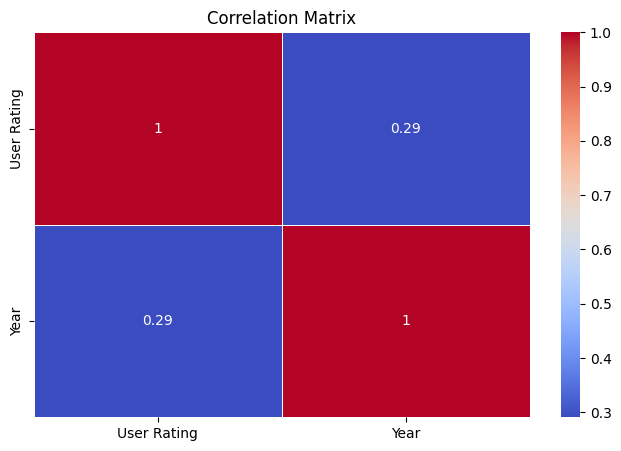

In [12]:
plt.figure(figsize=(8,5))
sns.heatmap(df1.corr(numeric_only=True), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [13]:
# Καθαρισμός του πεδίου 'Price' (αφαιρούμε το '$' και τα κόμματα και το μετατρέπουμε σε float)
df1['Price'] = df1['Price'].replace('[\$,]', '', regex=True).astype(float)

# Αν το πεδίο 'User Rating' έχει κενές τιμές ή μη αριθμητικά δεδομένα, μπορούμε να το καθαρίσουμε
df1['User Rating'] = pd.to_numeric(df1['User Rating'], errors='coerce')  # Μετατροπή σε αριθμούς, αντικαθιστώντας μη αριθμητικά με NaN

# Αν υπάρχουν NaN, μπορούμε να τα αντικαταστήσουμε ή να τα διαγράψουμε
df1 = df1.dropna(subset=['Price', 'User Rating'])  # Διαγραφή γραμμών με κενές τιμές στο 'Price' ή 'User Rating'

# Ελέγχουμε αν όλα τα δεδομένα είναι σωστά
print(df1[['Price', 'User Rating']].head())


   Price  User Rating
0   8.00          4.7
1  22.00          4.6
2  15.00          4.7
3   7.48          4.7
4   6.00          4.7


In [14]:
# Έλεγχος
print(df1[['Price', 'User Rating']].describe())


            Price  User Rating
count  650.000000   650.000000
mean    12.764169     4.635385
std     10.176392     0.221517
min      0.000000     3.300000
25%      7.000000     4.500000
50%     11.000000     4.700000
75%     15.000000     4.800000
max    105.000000     4.900000


/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:8

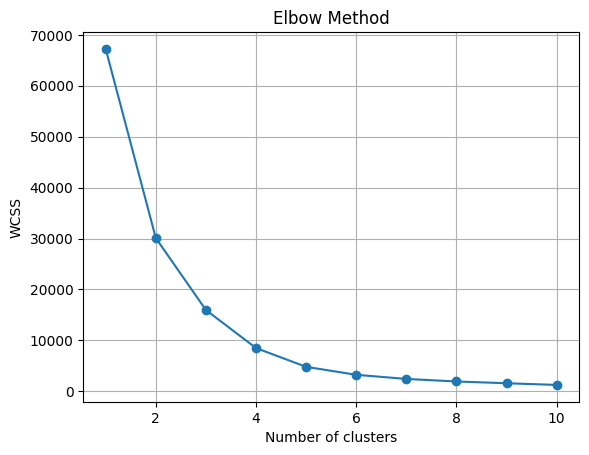

In [15]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Επιλογή χαρακτηριστικών Price και User Rating για Clustering
x = df1[['Price', 'User Rating']].values

# Elbow method για εύρεση ιδανικού αριθμού clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

# Plot για το elbow method
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


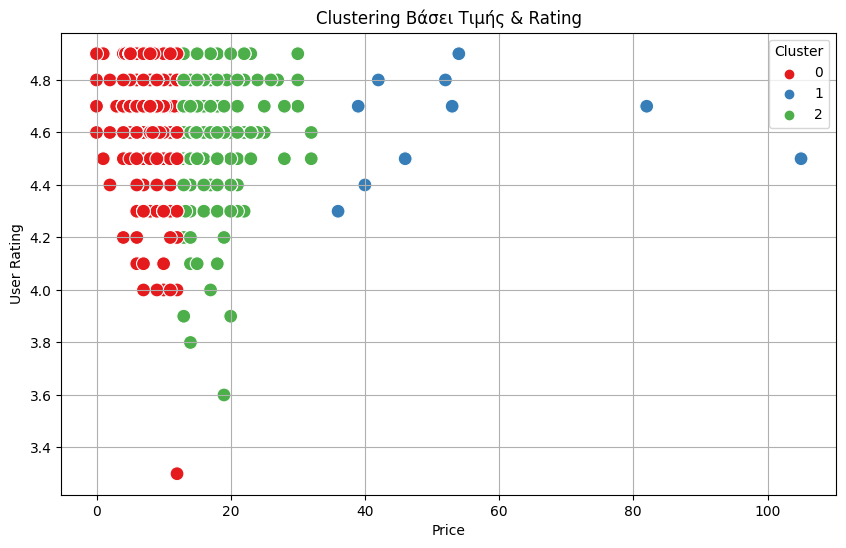

In [16]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
df1['Cluster'] = kmeans.fit_predict(x)

# Οπτικοποίηση
plt.figure(figsize=(10,6))
sns.scatterplot(x='Price', y='User Rating', hue='Cluster', data=df1, palette='Set1', s=100)
plt.title('Clustering Βάσει Τιμής & Rating')
plt.grid(True)
plt.show()


In [17]:
df1[['Name', 'Author', 'Price']].sort_values(by='Price', ascending=False).head(10)


,Name,Author,Price
87,Diagnostic and Statistical Manual of Mental Di...,American Psychiatric Association,105.0
88,Diagnostic and Statistical Manual of Mental Di...,American Psychiatric Association,105.0
559,The Twilight Saga Collection,Stephenie Meyer,82.0
179,Hamilton: The Revolution,Lin-Manuel Miranda,54.0
415,The Book of Basketball: The NBA According to T...,Bill Simmons,53.0
187,Harry Potter Paperback Box Set (Books 1-7),J. K. Rowling,52.0
331,Publication Manual of the American Psychologic...,American Psychological Association,46.0
335,Publication Manual of the American Psychologic...,American Psychological Association,46.0
334,Publication Manual of the American Psychologic...,American Psychological Association,46.0
328,Publication Manual of the American Psychologic...,American Psychological Association,46.0


In [18]:
df1[['Name', 'Author', 'User Rating']].sort_values(by='User Rating', ascending=False).drop_duplicates().head(10)


,Name,Author,User Rating
293,Obama: An Intimate Portrait,Pete Souza,4.9
568,The Very Hungry Caterpillar,Eric Carle,4.9
50,"Brown Bear, Brown Bear, What Do You See?",Bill Martin Jr.,4.9
268,"Magnolia Table, Volume 2",Joanna Gaines,4.9
185,Harry Potter and the Sorcerer's Stone: The Ill...,J.K. Rowling,4.9
45,Big Shot (Diary of a Wimpy Kid,Jeff Kinney,4.9
184,Harry Potter and the Prisoner of Azkaban: The ...,J.K. Rowling,4.9
420,"The Boy, the Mole, the Fox and the Horse",Charlie Mackesy,4.9
347,Rush Revere and the First Patriots: Time-Trave...,Rush Limbaugh,4.9
346,Rush Revere and the Brave Pilgrims: Time-Trave...,Rush Limbaugh,4.9


In [19]:
df1.groupby('Author')['Genre'].value_counts().unstack().fillna(0).sort_values(by='Fiction', ascending=False).head(10)


Genre,Fiction,Non Fiction
Author,,
Jeff Kinney,14.0,0.0
Suzanne Collins,12.0,0.0
Rick Riordan,11.0,0.0
Dr. Seuss,10.0,0.0
Dav Pilkey,9.0,0.0
Stephenie Meyer,8.0,0.0
Eric Carle,7.0,2.0
J.K. Rowling,6.0,0.0
Stieg Larsson,6.0,0.0


In [20]:
from sklearn.preprocessing import LabelEncoder

# Κωδικοποίηση κατηγορικών στηλών
le = LabelEncoder()

# Κωδικοποίηση των κατηγορικών χαρακτηριστικών
df1['Genre_encoded'] = le.fit_transform(df1['Genre'])
df1['Author_encoded'] = le.fit_transform(df1['Author'])
df1['Name_encoded'] = le.fit_transform(df1['Name'])

# Ελέγχουμε τα πρώτα δεδομένα
print(df1[['Genre', 'Genre_encoded', 'Author', 'Author_encoded', 'Name', 'Name_encoded']].head())


         Genre  Genre_encoded              Author  Author_encoded  \
0  Non Fiction              1            JJ Smith             135   
1      Fiction              0        Stephen King             259   
2  Non Fiction              1  Jordan B. Peterson             159   
3      Fiction              0       George Orwell             113   
4      Fiction              0       George Orwell             113   

                                      Name  Name_encoded  
0            10-Day Green Smoothie Cleanse             0  
1                        11/22/63: A Novel             1  
2  12 Rules for Life: An Antidote to Chaos             2  
3                                     1984             3  
4                   1984 (Signet Classics)             4  


In [21]:
labels_true = (df1['User Rating'] >= 4.5).astype(int)


In [22]:
from sklearn.cluster import KMeans

X = df1[['Price', 'User Rating']].values
kmeans = KMeans(n_clusters=2, random_state=42)
y_means = kmeans.fit_predict(X)


/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [23]:
from sklearn import metrics
score = metrics.adjusted_rand_score(labels_true, y_means)
print("Adjusted Rand Index:", score)


Adjusted Rand Index: -0.006617248381317498


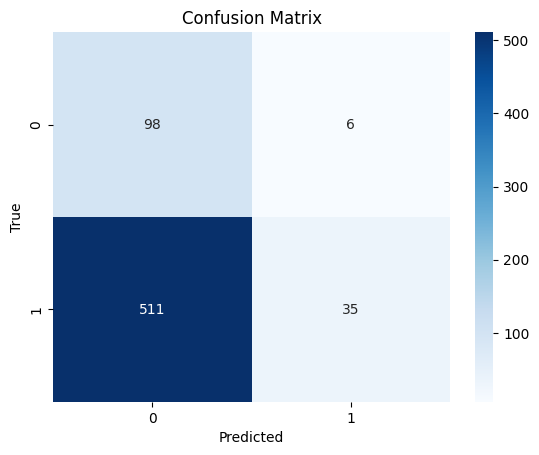

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(labels_true, y_means)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
